In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings


In [276]:
train = pd.read_csv('/content/drive/My Drive/Dataset_Twitter_Sentiment/train_tweet.csv')
test = pd.read_csv('/content/drive/My Drive/Dataset_Twitter_Sentiment/test_tweets.csv')

In [277]:
print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [278]:
data = train.append(test, ignore_index=True) 

In [281]:
data.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
49154,False,True,False
49155,False,True,False
49156,False,True,False
49157,False,True,False


In [282]:
data[49155:49158]

,id,label,tweet
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."


In [283]:
data = data[data['label'].notna()]

In [284]:
data.shape

(31962, 3)

In [285]:
data.head(5)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [286]:
# Checking negative comments

data[data['label'] == 1].head(5)

,id,label,tweet
13,14,1.0,@user #cnn calls #michigan middle school 'buil...
14,15,1.0,no comment! in #australia #opkillingbay #se...
17,18,1.0,retweet if you agree!
23,24,1.0,@user @user lumpy says i am a . prove it lumpy.
34,35,1.0,it's unbelievable that in the 21st century we'...


In [287]:
# Checking positive comments

data[data['label'] == 0].head(5)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


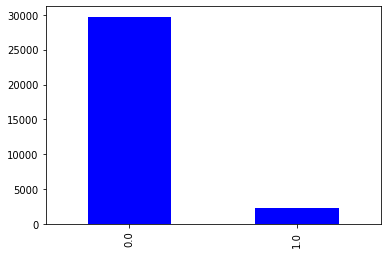

In [288]:
data['label'].value_counts().plot.bar(color = 'blue', figsize = (6, 4))

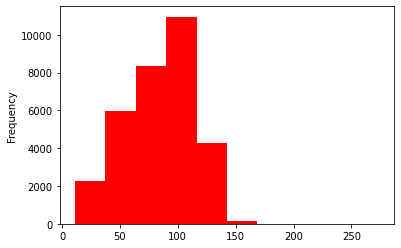

In [289]:
# Checking the distribution of tweets in the datasets

length_data = data['tweet'].str.len().plot.hist(color = 'red', figsize = (6, 4))

In [290]:
data.head(10)

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...
7,8,0.0,the next school year is the year for exams.ð...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...


In [291]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [292]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(data['tweet'][data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['tweet'][data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

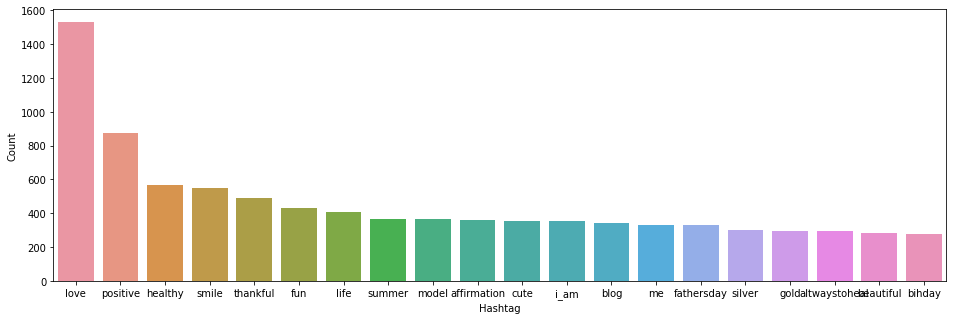

In [293]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

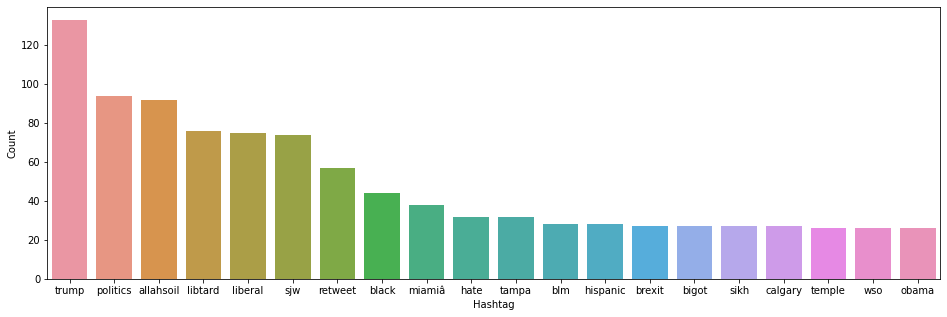

In [294]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [295]:
# adding a column to represent the length of the tweet

data['len'] = data['tweet'].str.len()

data.head(5)

,id,label,tweet,len
0,1,0.0,@user when a father is dysfunctional and is s...,102
1,2,0.0,@user @user thanks for #lyft credit i can't us...,122
2,3,0.0,bihday your majesty,21
3,4,0.0,#model i love u take with u all the time in ...,86
4,5,0.0,factsguide: society now #motivation,39


In [296]:
data.groupby('label').describe()

id                                   ...   len                    
         count          mean          std   min  ...   25%   50%    75%    max
label                                            ...                          
0.0    29720.0  15974.454441  9223.783469   1.0  ...  62.0  88.0  107.0  274.0
1.0     2242.0  16074.896075  9267.955758  14.0  ...  69.0  96.0  111.0  152.0

[2 rows x 16 columns]

In [297]:
data.isnull().sum()

id       0
label    0
tweet    0
len      0
dtype: int64

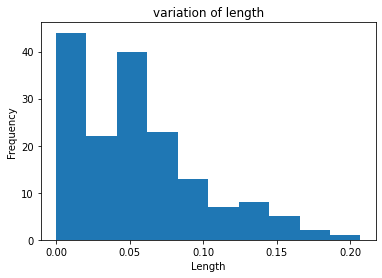

In [298]:
# Plottting the variation of lengths across the dataset

data.groupby('len').mean()['label'].plot.hist(figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [299]:
data['tweet'] =  data['tweet'].str.replace('@[\w]*','')
data['tweet'] =  data['tweet'].str.replace(r"[^a-zA-Z0-9]+",' ')
data['tweet'] =  data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
#re.sub(r"[^a-zA-Z0-9]+", ' ', k)

In [300]:
 data.head(10)

,id,label,tweet,len
0,1,0.0,when father dysfunctional and selfish drags hi...,102
1,2,0.0,thanks for lyft credit can use cause they don ...,122
2,3,0.0,bihday your majesty,21
3,4,0.0,model love take with all the time,86
4,5,0.0,factsguide society now motivation,39
5,6,0.0,huge fan fare and big talking before they leav...,116
6,7,0.0,camping tomorrow danny,74
7,8,0.0,the next school year the year for exams can th...,143
8,9,0.0,won love the land allin cavs champions clevela...,87
9,10,0.0,welcome here gr8,50


In [301]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [302]:
stop_words = set(stopwords.words("english"))

In [303]:
len(stop_words)

179

In [304]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sent in tqdm(text_data):
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stop_words)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [305]:
data['tweet'] = preprocess_text(data['tweet'].values)

100%|██████████| 31962/31962 [00:00<00:00, 251935.86it/s]


In [306]:
data['tweet'].head(10)

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                                 model love take time
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
6                               camping tomorrow danny
7    next school year year exams think school exams...
8    love land allin cavs champions cleveland cleve...
9                                          welcome gr8
Name: tweet, dtype: object

Word cloud for al words

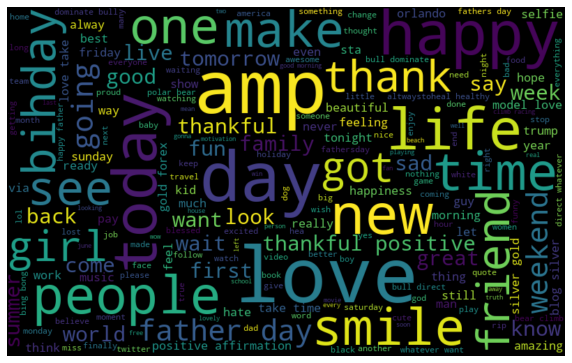

In [307]:
from wordcloud import WordCloud 

all_words = ' '.join([text for text in data['tweet']]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Word cloud for Positive words

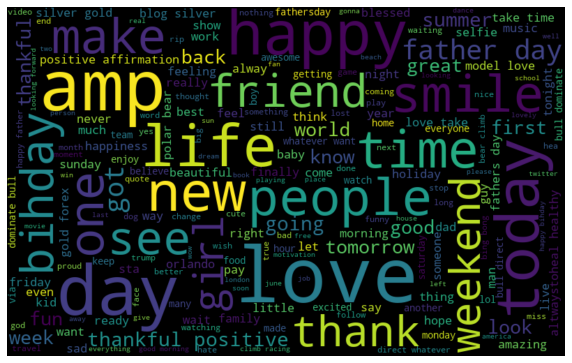

In [308]:
pos_words = ' '.join([text for text in data['tweet'][data['label']==0]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(pos_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Word cloud for negaive words

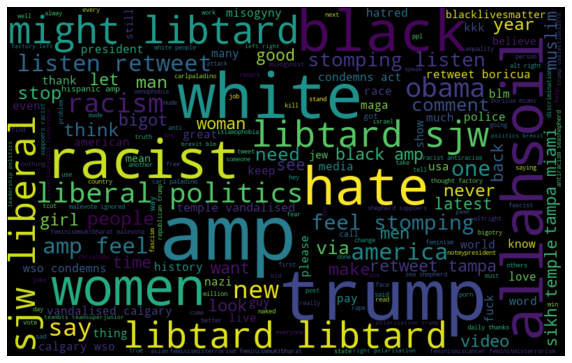

In [309]:
neg_words = ' '.join([text for text in data['tweet'][data['label']==1]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neg_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [310]:
#for i in range(len(tokenized_tweet)):
#      tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
#data['tweet'] = tokenized_tweet

In [311]:
len(data['tweet'])

31962

In [312]:
length = len(data['tweet'])

In [313]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split()) # tokenizing 

import gensim

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['tweet']), epochs=20)


(4145984, 4802260)

In [314]:
 model_w2v.wv.most_similar(positive = "dinner")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lamb', 0.6575556993484497),
 ('shawarma', 0.6466426849365234),
 ('whoopppp', 0.636394739151001),
 ('spaghetti', 0.6355316042900085),
 ('breakfasting', 0.6269499063491821),
 ('gown', 0.620859682559967),
 ('surabaya', 0.6149786710739136),
 ('cookout', 0.6063969135284424),
 ('foodblogger', 0.6002957820892334),
 ('spagetti', 0.6001895070075989)]

In [315]:
 model_w2v.wv.most_similar(positive = "trump")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dumptrump', 0.5787397027015686),
 ('suppoer', 0.5689601302146912),
 ('donald', 0.5612481236457825),
 ('delegaterevolt', 0.5412583351135254),
 ('remarks', 0.5374819040298462),
 ('commie', 0.531323254108429),
 ('fuhered', 0.5308712720870972),
 ('makeamericagreatagain', 0.5161980986595154),
 ('mustfall', 0.5112659931182861),
 ('volumes', 0.5109437704086304)]

In [316]:
model_w2v.wv.most_similar(positive = "love")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mommylife', 0.5312290191650391),
 ('ciao', 0.5109577775001526),
 ('pinned', 0.5055288076400757),
 ('husbandandwife', 0.5031119585037231),
 ('kiddos', 0.5020320415496826),
 ('myson', 0.4947916865348816),
 ('regram', 0.4941239356994629),
 ('mik', 0.4933876693248749),
 ('chess', 0.4919750392436981),
 ('modellife', 0.4918881952762604)]

In [317]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [318]:
def word_vector(tokens, size):
      vec = np.zeros(size).reshape((1, size))
      count = 0.
      for word in tokens:
        try:         
          vec += model_w2v[word].reshape((1, size))
          count += 1
        except KeyError: # handling the case where the token is not in vocabulary 
          continue
          
        if count != 0:
          vec /= count
      return vec


In [319]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
  wordvec_df = pd.DataFrame(wordvec_arrays) 
wordvec_df.shape    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(31962, 200)

In [322]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(data['tweet']).toarray()
y = data.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [323]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [324]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [325]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.997496975512077
Validation Accuracy : 0.9450631960956075
F1 score : 0.5838862559241706
[[7244  188]
 [ 251  308]]


In [327]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 

xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, data['label'],random_state=42,test_size=0.3)
#xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
#xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [331]:
from sklearn.linear_model import LogisticRegression 

In [337]:
lreg = LogisticRegression(random_state=0)
lreg.fit(xtrain_w2v,ytrain) 

 = lreg.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.4128787878787879

In [ ]:
cm = confusion_matrix(y_test, y_pred)